In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image

In [ ]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [ ]:
y = shuffle(x)[:2]
y

array([[4, 5, 6],
       [1, 2, 3]])

In [ ]:
np.transpose(shuffle(np.transpose(y)))

array([[6, 5, 4],
       [3, 2, 1]])

In [ ]:
china = load_sample_image('china.jpg')

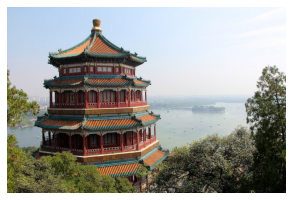

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
ax1.imshow(china);
ax1.axis('off');

In [ ]:
r,c,d = china.shape

In [ ]:
china_2d = np.reshape(china,(r*c,d))
china_2d.shape

(273280, 3)

In [ ]:
#just testing
china_3d = np.reshape(china_2d,(r, c, d))
(china_3d == china).all()

True

In [ ]:
# 1 - This first one assign 64 random pixels as the clusters centroids and do not change them. It's like running the k-means model only once, without optimizing it.

centroids_random = shuffle(china_2d, random_state = 0)[:64]
china_random = pairwise_distances_argmin(centroids_random, china_2d, axis=0)
china_random.shape

(273280,)

In [ ]:
china_64 = np.zeros([len(china_random),3])
china_64[:3]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
for i in range(0, len(china_random)):
  china_64[i] = centroids_random[china_random[i]]

In [ ]:
china_64_3d = np.reshape(china_64,(r,c,d))
china_64_3d = china_64_3d.astype(np.uint8)

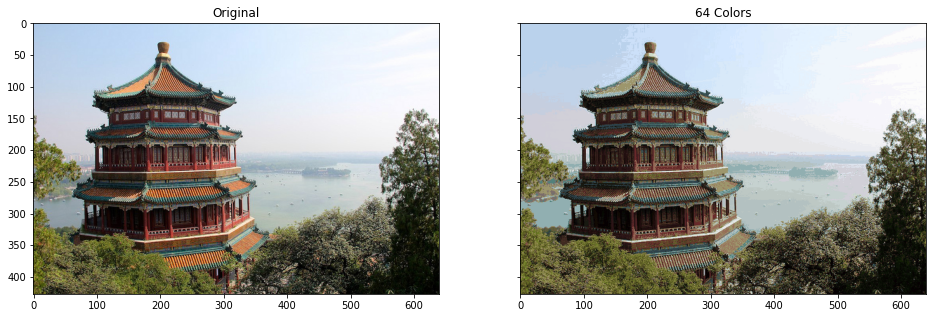

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey='row', figsize = (16,10))
ax1.imshow(china)
ax2.imshow(china_64_3d)
ax1.set_title('Original');
ax2.set_title('64 Colors');

In [ ]:
# Using the K-means module
kmeans = KMeans(n_clusters=64, n_init=10).fit(china_2d)

In [ ]:
kmeans?

In [ ]:
kmeans.cluster_centers_.shape #the position of each cluster_center

In [ ]:
kmeans.labels_[:10] # the cluster_center of each point

In [ ]:
len(kmeans.labels_)

In [ ]:
centroid_kmeans = kmeans.cluster_centers_.astype(np.uint8)
centroid_kmeans[0:5]

In [ ]:
china_64_kmeans = np.zeros([len(kmeans.labels_),3])
for j in range(0, len(kmeans.labels_)):
  china_64_kmeans[j] = centroid_kmeans[kmeans.labels_[j]]

china_64_kmeans_3d = np.reshape(china_64_kmeans,(r,c,d))
china_64_kmeans_3d = china_64_kmeans_3d.astype(np.uint8)
china_64_kmeans_3d[325][150:155]

(-0.5, 639.5, 426.5, -0.5)

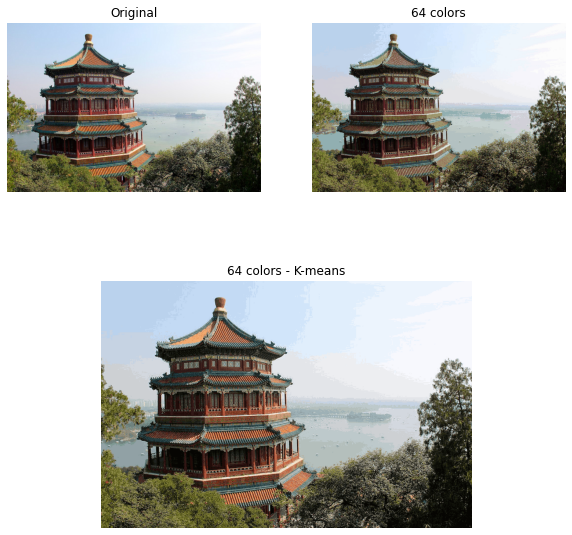

In [ ]:
figure_1 = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, fig=figure_1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, fig=figure_1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2, fig=figure_1)
figure_1.tight_layout
ax1.imshow(china)
ax2.imshow(china_64_3d)
ax3.imshow(china_64_kmeans_3d)
ax1.set_title('Original');
ax2.set_title('64 colors');
ax3.set_title('64 colors - K-means');
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

## Kmeans - Manual Implementation

  The following function is a manual implementation of the kmeans algorithm. It chooses the centroids from each cluster at random and from there it defines from which cluster each pixel belongs. It creates, then, a new array with each pixel from the image with its respective centroid value (creating a image with n_clusters colors) and calculates the cost function.
  Then it starts the iteration step:

   
   Recalculates the value of each centroid from the mean of the cluster points in each cluster.
  
   Defines yet again from which cluster each pixel belongs and creates the new image, calculates the cost function and compares it with the cost function obtained before. If the new value is higher it means that the algorithm is diverging and the process stops. 
   
   This can occur when the centroid values chosen randomly are bad. Running the function multiple times will provide different final centroid values beacuse of the first randomly assigned centroid values (I used the random state so I can get just one value when running the function multiple times, but this is not necessary). Running the function multiple times might end up in a better or worse centroid values but, if the function converges, the final result (image) will be almost the same. 

In [ ]:
def k_means_manual(n_clusters, data_set):

  conjunto_index = np.zeros(len(data_set))
  cjt_temp = conjunto_index
  
  grupo = np.zeros([len(data_set), data_set.shape[1]])
  grp_temp = grupo
  
  clusters_cent = (shuffle(data_set, random_state=1)[:n_clusters]).astype(float)
  
  data_set = data_set.astype(float)

  for i in range(len(data_set)):
    conjunto_index[i] = np.linalg.norm(data_set[i] - clusters_cent, axis=1).argmin() #conjunto_index = labels of each pixel
    #c[i] = (np.sqrt(np.sum(((data_set[i]-clusters_cent)**2), axis=1))).argmin() 
    grupo[i] = clusters_cent[int(conjunto_index[i])] #new image

  
  COST = (1/n_clusters)*sum((np.linalg.norm(data_set - grupo, axis=1))**2)
  #COST = (1/n_clusters)*sum((np.sqrt((np.sum(((data_set - grupo)**2), axis=1))))**2)
  
  for k in range(10):
    for j in range(n_clusters):
      indice = (np.where(conjunto_index == j)[0].tolist())  # lista de indices de c(labels)

      soma = 0;
      media = 0;
      soma = np.sum(data_set[indice], axis=0)

      with np.errstate(divide='ignore', invalid='ignore'):
        media = soma/len(indice)
      
      clusters_cent[j] = media

    for i in range(len(data_set)):
      cjt_temp[i] = np.linalg.norm(data_set[i] - clusters_cent, axis=1).argmin()
      grp_temp[i] = clusters_cent[int(cjt_temp[i])]

    
    COST_temp = (1/n_clusters)*sum((np.linalg.norm(data_set - grp_temp, axis=1))**2)
    print(COST_temp)

    if COST_temp < COST:
      conjunto_index = cjt_temp
      grupo = grp_temp
      COST = COST_temp
    else:
      break
  
  return conjunto_index, grupo, clusters_cent, COST
""" 
# THE FOLLOWING FUNCTION IS THE SAME AS BEFORE, BUT IT USES THE PAIRWISE_DISTANCES_ARGMIN FROM SKLEARN, WHICH SPEEDS UP THE ITERATION. IT RUNS INTO AN ERROR 
# THOUGH, IF THE LEN(INDICE) == 0 (WHICH HAPPENS BECAUSE OF BAD RANDOMLY ASSIGNED CENTROID VALUES). 

# K-means algorithm - Manual Implementation
def k_means_manual(n_clusters, data_set):

  conjunto_index = np.zeros(len(data_set))
  cjt_temp = conjunto_index
  
  grupo = np.zeros([len(data_set), data_set.shape[1]])
  grp_temp = grupo
  
  clusters_cent = (shuffle(data_set, random_state=1)[:n_clusters]).astype(float)
  
  data_set = data_set.astype(float)

  
  conjunto_index = pairwise_distances_argmin(clusters_cent, data_set, axis=0)
  
  for i in range(len(data_set)):
    grupo[i] = clusters_cent[int(conjunto_index[i])]

  COST = (1/n_clusters)*sum((np.linalg.norm(data_set - grupo, axis=1))**2)
    
  for k in range(10):
    for j in range(n_clusters):
      indice = (np.where(conjunto_index == j)[0].tolist())  # lista de indices de c(labels) 
      soma = 0;
      media = 0;
      soma = np.sum(data_set[indice], axis=0)
      with np.errstate(divide='ignore', invalid='ignore'):
        media = soma/len(indice)
      clusters_cent[j] = media

    cjt_temp = pairwise_distances_argmin(clusters_cent, data_set, axis=0)

    for i in range(len(data_set)):
      grp_temp[i] = clusters_cent[int(cjt_temp[i])]

    COST_temp = (1/n_clusters)*sum((np.linalg.norm(data_set - grp_temp, axis=1))**2)
    print(COST_temp)
    if COST_temp < COST:
      conjunto_index = cjt_temp
      grupo = grp_temp
      COST = COST_temp
    else:
      break

  return conjunto_index, grupo, clusters_cent, COST
  """

In [ ]:
indices, nova_imagem, cents_manual,_ = k_means_manual(64, china_2d) 

691386.3868592983
629605.2592133356
605449.6079711816
591930.3412741795
582576.5423201887
575663.0157862888
570739.755560508
567244.4388917958
564627.977873261
562414.6961607982


In [ ]:
g = np.reshape(nova_imagem,(r,c,d))
g = g.astype(np.uint8)
indices.shape

(273280,)

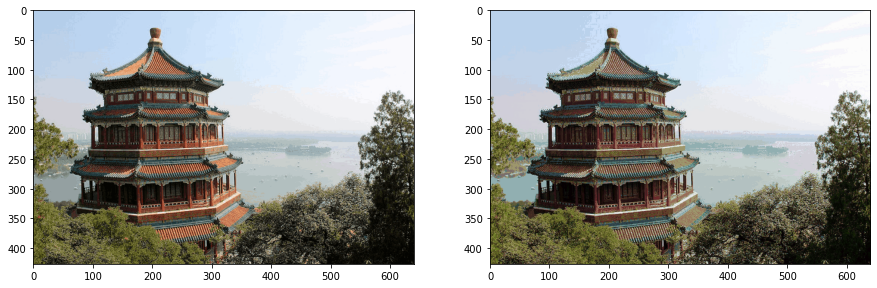

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax1.imshow(g)
ax2.imshow(china_64_3d)

In [ ]:
np.linalg.norm?

USING RANDOM DATAPOINTS

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
n_clusters = random.randint(3,7)
x, y = make_blobs(n_samples=540, centers=n_clusters, cluster_std=0.75, random_state=0)

array([[-2.12647081,  3.09847289],
       [ 2.23138367,  2.49677872],
       [ 1.60477435,  2.06184604]])

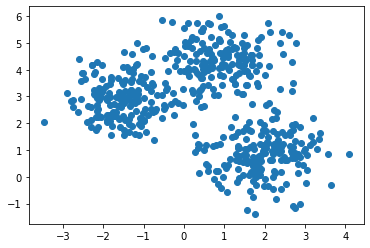

In [ ]:
plt.scatter(x[:,0], x[:,1]);
x[:3,:]

In [ ]:
indices, data_set_with_centroid_value, clust_centroids, J_cost_value = [], [], [], []
# TRYING DIFFERENT NUMBERS OF CLUSTERS

for i in range(1,8):
 a, b, c, d =  k_means_manual(i, x);
 indices.append(a);
 data_set_with_centroid_value.append(b);
 clust_centroids.append(c);
 J_cost_value.append(d);

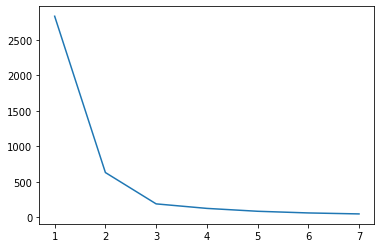

In [ ]:
plt.plot(range(1,8),J_cost_value)

FROM THE ELBOW THEORY, Nº CLUSTERS = 3 (THAT'S ALSO CAN BE SEEN IN THE SCATTER PLOT ABOVE, SO THE ALGORITHM IS WORKING AS INTENDED.)

In [ ]:
clust_centroids[2]

array([[-1.51837633,  2.90019034],
       [ 0.89036846,  4.33267081],
       [ 1.95638765,  0.81386964]])

In [ ]:
x[:3,:]

array([[-2.12647081,  3.09847289],
       [ 2.23138367,  2.49677872],
       [ 1.60477435,  2.06184604]])

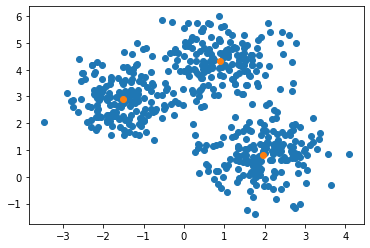

In [ ]:
plt.scatter(x[:,0], x[:,1]);
plt.scatter(clust_centroids[2][:,0], clust_centroids[2][:,1]);

In [ ]:
def predict_kmeans(clust_points, data_for_analysis):
  data_for_analysis = np.array(data_for_analysis)
  group_of_data_for_analysis = np.zeros(data_for_analysis.shape[0])
  
  for i in range(len(data_for_analysis)):
    group_of_data_for_analysis[i] = np.linalg.norm(data_for_analysis[i] - clust_points, axis=1).argmin()
  return group_of_data_for_analysis

In [ ]:
teste = [(1,2), (3,4), (-3,-2), (-1, 5)]

In [ ]:
grupos_teste = predict_kmeans(clust_centroids[2], teste)

In [ ]:
grupos_teste

array([2., 1., 0., 1.])

In [ ]:
group_lists = [[] for i in range(len(clust_centroids[2]))]
                                 
for i in range(len(group_lists)):
  group_lists[i].append(clust_centroids[2][i])
  for j in teste[np.where(grupos_teste == i)]:
    group_lists[i].append(j)

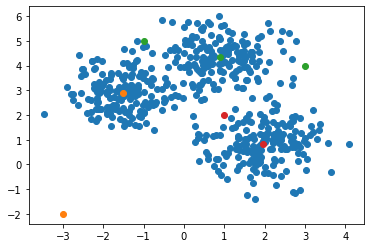

In [ ]:
plt.scatter(x[:,0], x[:,1]);
plt.scatter([np.array(group_lists[0])[:,0]], [np.array(group_lists[0])[:,1]]);
plt.scatter([np.array(group_lists[1])[:,0]], [np.array(group_lists[1])[:,1]]);
plt.scatter([np.array(group_lists[2])[:,0]], [np.array(group_lists[2])[:,1]]);

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10).fit(x)

In [ ]:
kmeans.cluster_centers_

array([[ 1.95638765,  0.81386964],
       [-1.51837633,  2.90019034],
       [ 0.89036846,  4.33267081]])

In [ ]:
kmeans.predict(np.array(teste))

array([1, 0, 2, 0], dtype=int32)